<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/Transfer_learning_with_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 14th Jan, 2023
# Train an Image Classifier with fastai and Transfer Learning
# Ref:
#      https://www.analyticsvidhya.com/blog/2021/05/training-state-of-the-art-deep-learning-models-with-fast-ai/
# Use GPU to accelerate training (Edit->Notebook settings)    

In [ ]:
# Not required as fastai upgrade
#  is generally already installed
!pip install fastai --upgrade

In [2]:
 # To see prettier 'help' using doc()
 !pip install nbdev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.9 MB/s eta 0:00:00


In [3]:
# Display multiple outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [4]:
# Call libraries:
from fastai.vision.all import *

In [5]:
# Download MNIST data
path = untar_data(URLs.MNIST)

In [6]:
# list directory contents 
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/training'),Path('/root/.fastai/data/mnist_png/testing')]

In [7]:
# Load images from directories
dls = ImageDataLoaders.from_folder(path=path, 
                                   train='training', 
                                   valid='testing', 
                                   shuffle=True)

In [8]:
# It is an object of DataLoaders class
type(dls)

fastai.data.core.DataLoaders

In [ ]:
# Get help on ImageDataLoaders
#  And read more about it
doc(ImageDataLoaders.from_folder)

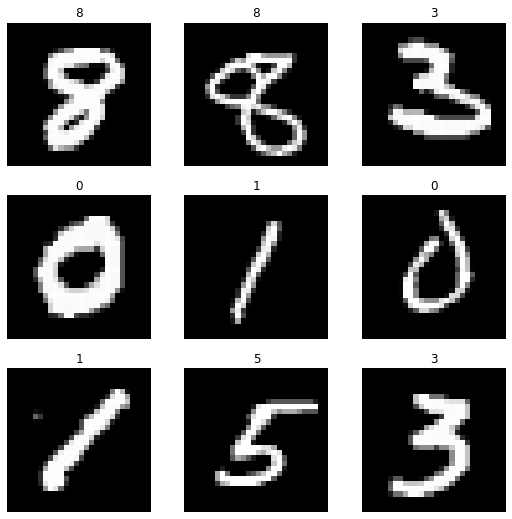

In [9]:
# Look at a batch of images
dls.train.show_batch()


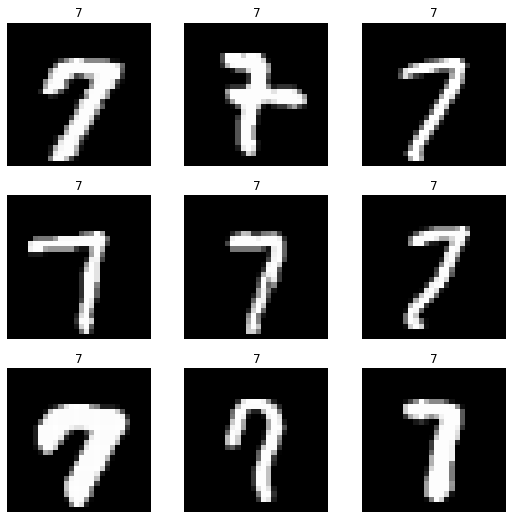

In [10]:
dls.valid.show_batch()

In [11]:
learn = cnn_learner(dls, 
                    resnet18, 
                    metrics=[accuracy, error_rate])

/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pt

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [13]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
# Train for 4-epochs
# Use GPU for faster training (Edit->Notebook settings)
# CPU consumes around 8 minutes per epoch
# GPU takes 1.30 minutes per epoch
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.697555,0.441798,0.858500,0.141500,01:17


epoch,train_loss,valid_loss,accuracy,error_rate,time


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.131508,0.064983,0.979600,0.020400,01:12
1,0.076328,0.047094,0.985700,0.014300,01:11
2,0.031929,0.032133,0.991000,0.009000,01:11
3,0.015049,0.029735,0.991100,0.008900,01:12


In [ ]:
# get all the image paths from testing folder
images = get_image_files(path / 'testing')

In [ ]:
# select an image and display
img = PILImage.create(images[4432])
img

In [ ]:
# predict the image class
lbl, _ , _ = learn.predict(img)
lbl

'6'

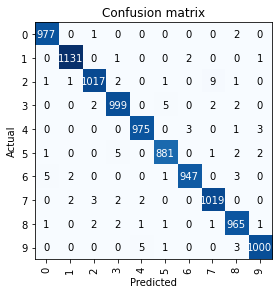

In [ ]:
# We can also generate classification report from the model for inference
interep = ClassificationInterpretation.from_learner(learn)
interep.plot_confusion_matrix()

In [ ]:
################# Done ######################33

# Single Label Classification

In [ ]:
# Ref:
#    https://docs.fast.ai/tutorial.vision.html#single-label-classification

For this task, we will use the [Oxford-IIIT Pet Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/) that contains images of cats and dogs of 37 different breeds. We will first show how to build a simple cat-vs-dog classifier, then a little bit more advanced model that can classify all breeds.

In [14]:
# The dataset can be downloaded and decompressed with this line of code:
path = untar_data(URLs.PETS)

It will only do this download once, and return the location of the decompressed archive. We can check what is inside with the .ls() method.

In [ ]:
path.ls()

We will ignore the annotations folder for now, and focus on the images one. [get_image_files](https://docs.fast.ai/data.transforms.html#get_image_files) is a fastai function that helps us grab all the image files (recursively) in one folder.

In [15]:
files = get_image_files(path/"images")
len(files)

7390

## Labeling images

To label our data for the cats vs dogs problem, we need to know which filenames are of dog pictures and which ones are of cat pictures. There is an easy way to distinguish: the name of the file begins with a capital for cats, and a lowercased letter for dogs:

In [17]:
files[0],files[6]

(Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_30.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_57.jpg'))

In [18]:
# We can then define an easy label function:
def label_func(f): return f[0].isupper()

To get our data ready for a model, we need to put it in a [DataLoaders](https://docs.fast.ai/data.core.html#dataloaders) object. Here we have a function that labels using the file names, so we will use [ImageDataLoaders.from_name_func](https://docs.fast.ai/vision.data.html#imagedataloaders.from_name_func). There are other factory methods of [ImageDataLoaders](https://docs.fast.ai/vision.data.html#imagedataloaders) that could be more suitable for your problem, so make sure to check them all in vision.data.

We have passed to following function the directory we’re working in, the files we grabbed, our label_func and one last piece as item_tfms: this is a Transform applied on all items of our dataset that will resize each image to 224 by 224, by using a random crop on the largest dimension to make it a square, then resizing to 224 by 224. If we didn’t pass this, we would get an error later as it would be impossible to batch the items together.

In [19]:
dls = ImageDataLoaders.from_name_func(path,
                                      files,
                                      label_func,
                                      item_tfms=Resize(224)
                                      )

 if everything looks okay with the [show_batch](https://docs.fast.ai/vision.gan.html#show_batch) method (True is for cat, False is for dog):

Then we can create a [Learner](https://docs.fast.ai/learner.html#learner), which is a fastai object that combines the data and a model for training, and uses transfer learning to fine tune a pretrained model in just two lines of code:

In [20]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.158940,0.014089,0.004060,01:00


epoch,train_loss,valid_loss,error_rate,time
0,0.061121,0.013995,0.005413,00:58


The first line downloaded a model called ResNet34, pretrained on [ImageNet](https://image-net.org/), and adapted it to our specific problem. It then fine tuned that model and in a relatively short time, we get a model with an error rate of well under 1%… amazing!

## Prediction

If you want to make a prediction on a new image, you can use `learn.predict`:

In [21]:
learn.predict(files[0])

('False', TensorBase(0), TensorBase([1.0000e+00, 2.7056e-08]))

The predict method returns three things: the decoded prediction (here False for dog), the index of the predicted class and the tensor of probabilities of all classes in the order of their indexed labels(in this case, the model is quite confident about the being that of a dog). This method accepts a filename, a PIL image or a tensor directly in this case. We can also have a look at some predictions with the [show_results](https://docs.fast.ai/vision.learner.html#show_results) method:

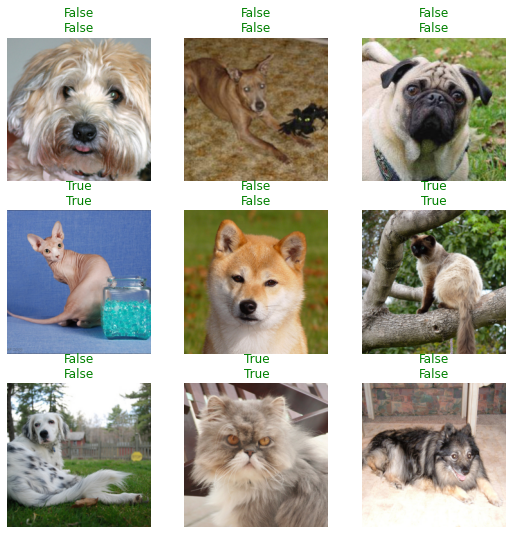

In [22]:
learn.show_results()

Briefly, steps are:
>A gather the data<br> 
>look at it<br>
>create a Learner<br>
>train the model<br> 
>and look at some predictions<br>

In [ ]:
######################## Done #############################

# Classifying breeds


Multilabel classification<br>
[See further this link](https://docs.fast.ai/tutorial.vision.html#classifying-breeds)

In [23]:
#########